## Index for dom_initial_explore_NUTS2.ipynb code

Description: View of tendencies in the data different variables (crops and education) for NUTS2 level regions

### 1. Preparation of the data for NUTS 2 analysis
   - Load the data
   - Add the names of the regions NUTS2 to the data

### 2. Find tendencies in the Crops by region for NUTS2
   - Prepare the data
   - Plots to find differences between regions 

### 3. Call the education dataframe

-----------------------------------------------------------------------------------------

## 1. Preparation of the data for NUTS 2 analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats as stm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
permcrop_df = pd.read_csv('../CSVs/Permanent_Crop_NUTS2_2019.csv', sep=",")
tempcrop_df = pd.read_csv('../CSVs/Temporary_Crop_NUTS2_2019.csv', sep=",")
education_df = pd.read_csv('../CSVs/Education_NUTS2_2019.csv', sep=",")
labour_df = pd.read_csv('../CSVs/Labour_NUTS2_2019.csv', sep=",")
prod_df = pd.read_csv('../CSVs/Production_NUTS2_2019.csv', sep=",")

In [3]:
dataframes = [permcrop_df, tempcrop_df, education_df, labour_df, prod_df]

for df in dataframes:
    df.replace({'Região Autónoma da Madeira ': 'Madeira', 'Região Autónoma dos Açores ': 'Açores', 'Área Metropolitana de Lisboa': 'Lisboa'}, inplace=True)

In [4]:
permcrop_df['region_name'].unique()

array(['Norte', 'Algarve', 'Centro', 'Lisboa', 'Alentejo', 'Açores',
       'Madeira'], dtype=object)

## 2. Find tendencies in the Crops by region for NUTS2

In [5]:
permcrop_df.head()

,NutsID,region_name,NUTS_level,pc.year,pc.area,pc.hold,pcn.crop_name
0,11,Norte,2,2019,255954,88611,Total
1,11,Norte,2,2019,13815,17257,Fresh fruit plantations (excluding citrus plan...
2,11,Norte,2,2019,1257,5221,Citrus plantations
3,11,Norte,2,2019,2619,1501,Fruit plantations (subtropical climate zones)
4,11,Norte,2,2019,73849,33765,Nuts plantations


In [6]:
tempcrop_df.head()

,NutsID,region_name,NUTS_level,tc.year,tc.area,tc.hold,tcn.crop_name
0,11,Norte,2,2019,151107,54566,Total
1,11,Norte,2,2019,38251,34891,Cereals
2,11,Norte,2,2019,1913,6615,Dried pulses
3,11,Norte,2,2019,6841,6597,Temporary grasses and grazings
4,11,Norte,2,2019,96034,28265,Fodder plants


In [30]:
permcrop_df['pc.avg_area_hold'] = round(permcrop_df['pc.area'] / permcrop_df['pc.hold'], 3)
tempcrop_df['tc.avg_area_hold'] = round(tempcrop_df['tc.area'] / tempcrop_df['tc.hold'], 3)

In [33]:
pc_pivot = pd.pivot_table(
    data=permcrop_df,
    index='region_name',
    columns=['pcn.crop_name'],
    values='pc.area'
)
pc_pivot

pcn.crop_name,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Total,Vineyards
region_name,,,,,,,,
Alentejo,2260.0,5926.0,380.0,107298.0,205363.0,630.0,358544.0,36686.0
Algarve,13951.0,3744.0,1937.0,26179.0,9409.0,21.0,56754.0,1513.0
Açores,350.0,116.0,481.0,97.0,0.0,107.0,2574.0,1424.0
Centro,1039.0,26364.0,1032.0,17008.0,78956.0,1453.0,168086.0,42234.0
Lisboa,639.0,1443.0,177.0,4152.0,730.0,20.0,16428.0,9266.0
Madeira,118.0,267.0,1076.0,123.0,0.0,19.0,2322.0,719.0
Norte,1257.0,13815.0,2619.0,73849.0,82777.0,226.0,255954.0,81411.0


In [8]:
pc_pivot = pc_pivot[['Citrus plantations', 
                     'Fresh fruit plantations (excluding citrus plantations)', 
                     'Fruit plantations (subtropical climate zones)', 
                     'Nuts plantations', 
                     'Olive plantations', 
                     'Other permanent crops', 
                     'Vineyards', 
                     'Total']]

In [9]:
pc_pivot

pcn.crop_name,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Vineyards,Total
region_name,,,,,,,,
Alentejo,2260.0,5926.0,380.0,107298.0,205363.0,630.0,36686.0,358544.0
Algarve,13951.0,3744.0,1937.0,26179.0,9409.0,21.0,1513.0,56754.0
Açores,350.0,116.0,481.0,97.0,0.0,107.0,1424.0,2574.0
Centro,1039.0,26364.0,1032.0,17008.0,78956.0,1453.0,42234.0,168086.0
Lisboa,639.0,1443.0,177.0,4152.0,730.0,20.0,9266.0,16428.0
Madeira,118.0,267.0,1076.0,123.0,0.0,19.0,719.0,2322.0
Norte,1257.0,13815.0,2619.0,73849.0,82777.0,226.0,81411.0,255954.0


In [10]:
tc_pivot = pd.pivot_table(
    data=tempcrop_df,
    index='region_name',
    columns=['tcn.crop_name'],
    values='tc.area'
)
tc_pivot

tcn.crop_name,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Sugarbeets,Temporary grasses and grazings,Total
region_name,,,,,,,,,,,
Alentejo,138011.0,13185.0,707.0,199160.0,26614.0,9650.0,1438.0,2752.0,0.0,82035.0,473551.0
Algarve,2596.0,106.0,276.0,6158.0,915.0,148.0,178.0,83.0,0.0,1659.0,12120.0
Açores,35.0,30.0,49.0,26703.0,673.0,5.0,235.0,324.0,0.0,14767.0,42822.0
Centro,46322.0,3279.0,170.0,91275.0,11597.0,303.0,934.0,4260.0,0.0,13747.0,171887.0
Lisboa,9349.0,184.0,307.0,13637.0,7749.0,242.0,122.0,1702.0,0.0,1521.0,34812.0
Madeira,34.0,0.0,45.0,77.0,814.0,180.0,456.0,473.0,0.0,7.0,2085.0
Norte,38251.0,1913.0,368.0,96034.0,3634.0,164.0,113.0,3789.0,0.0,6841.0,151107.0


In [11]:
tc_pivot.drop(labels='Sugarbeets', axis=1, inplace=True)

In [12]:
tc_pivot

tcn.crop_name,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Temporary grasses and grazings,Total
region_name,,,,,,,,,,
Alentejo,138011.0,13185.0,707.0,199160.0,26614.0,9650.0,1438.0,2752.0,82035.0,473551.0
Algarve,2596.0,106.0,276.0,6158.0,915.0,148.0,178.0,83.0,1659.0,12120.0
Açores,35.0,30.0,49.0,26703.0,673.0,5.0,235.0,324.0,14767.0,42822.0
Centro,46322.0,3279.0,170.0,91275.0,11597.0,303.0,934.0,4260.0,13747.0,171887.0
Lisboa,9349.0,184.0,307.0,13637.0,7749.0,242.0,122.0,1702.0,1521.0,34812.0
Madeira,34.0,0.0,45.0,77.0,814.0,180.0,456.0,473.0,7.0,2085.0
Norte,38251.0,1913.0,368.0,96034.0,3634.0,164.0,113.0,3789.0,6841.0,151107.0


In [13]:
tc_pivot.rename(columns={'Total': 'Total_temp_crop'}, inplace=True)
pc_pivot.rename(columns={'Total': 'Total_perm_crop'}, inplace=True)

In [14]:
total_crops = pc_pivot.join(tc_pivot, on='region_name', how='inner')

In [15]:
total_crops

,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Vineyards,Total_perm_crop,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Temporary grasses and grazings,Total_temp_crop
region_name,,,,,,,,,,,,,,,,,,
Alentejo,2260.0,5926.0,380.0,107298.0,205363.0,630.0,36686.0,358544.0,138011.0,13185.0,707.0,199160.0,26614.0,9650.0,1438.0,2752.0,82035.0,473551.0
Algarve,13951.0,3744.0,1937.0,26179.0,9409.0,21.0,1513.0,56754.0,2596.0,106.0,276.0,6158.0,915.0,148.0,178.0,83.0,1659.0,12120.0
Açores,350.0,116.0,481.0,97.0,0.0,107.0,1424.0,2574.0,35.0,30.0,49.0,26703.0,673.0,5.0,235.0,324.0,14767.0,42822.0
Centro,1039.0,26364.0,1032.0,17008.0,78956.0,1453.0,42234.0,168086.0,46322.0,3279.0,170.0,91275.0,11597.0,303.0,934.0,4260.0,13747.0,171887.0
Lisboa,639.0,1443.0,177.0,4152.0,730.0,20.0,9266.0,16428.0,9349.0,184.0,307.0,13637.0,7749.0,242.0,122.0,1702.0,1521.0,34812.0
Madeira,118.0,267.0,1076.0,123.0,0.0,19.0,719.0,2322.0,34.0,0.0,45.0,77.0,814.0,180.0,456.0,473.0,7.0,2085.0
Norte,1257.0,13815.0,2619.0,73849.0,82777.0,226.0,81411.0,255954.0,38251.0,1913.0,368.0,96034.0,3634.0,164.0,113.0,3789.0,6841.0,151107.0


In [16]:
total_crops['Total_crop_area'] = total_crops['Total_perm_crop'] + total_crops['Total_temp_crop']

In [17]:
total_crops[['Total_perm_crop', 'Total_temp_crop', 'Total_crop_area']]

,Total_perm_crop,Total_temp_crop,Total_crop_area
region_name,,,
Alentejo,358544.0,473551.0,832095.0
Algarve,56754.0,12120.0,68874.0
Açores,2574.0,42822.0,45396.0
Centro,168086.0,171887.0,339973.0
Lisboa,16428.0,34812.0,51240.0
Madeira,2322.0,2085.0,4407.0
Norte,255954.0,151107.0,407061.0


In [18]:
total_crops.rename(index={'Região Autónoma da Madeira ': 'Madeira', 'Região Autónoma dos Açores ': 'Açores', 'Área Metropolitana de Lisboa': 'Lisboa'}, inplace=True)

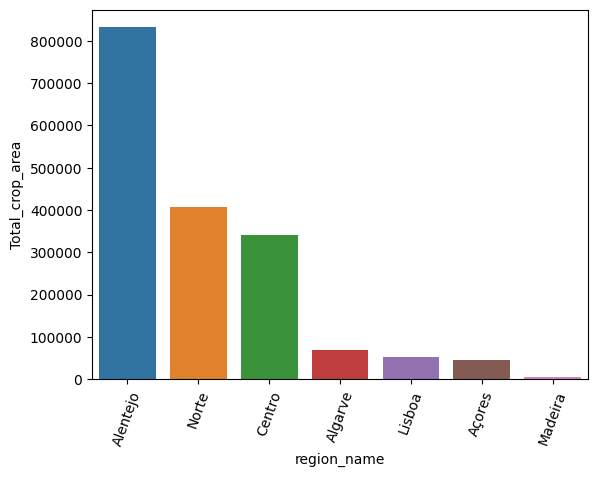

In [19]:
sorted_total_crops = total_crops.sort_values(by='Total_crop_area', ascending=False)


sns.barplot(data=sorted_total_crops[['Total_crop_area']], 
            x=sorted_total_crops.index, 
            y='Total_crop_area',
            hue=sorted_total_crops.index)

plt.xticks(rotation=70)
plt.show()

In [20]:
only_crops = total_crops.drop(['Total_crop_area', 'Total_perm_crop', 'Total_temp_crop'], axis=1)
only_crops.head()

,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Vineyards,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Temporary grasses and grazings
region_name,,,,,,,,,,,,,,,,
Alentejo,2260.0,5926.0,380.0,107298.0,205363.0,630.0,36686.0,138011.0,13185.0,707.0,199160.0,26614.0,9650.0,1438.0,2752.0,82035.0
Algarve,13951.0,3744.0,1937.0,26179.0,9409.0,21.0,1513.0,2596.0,106.0,276.0,6158.0,915.0,148.0,178.0,83.0,1659.0
Açores,350.0,116.0,481.0,97.0,0.0,107.0,1424.0,35.0,30.0,49.0,26703.0,673.0,5.0,235.0,324.0,14767.0
Centro,1039.0,26364.0,1032.0,17008.0,78956.0,1453.0,42234.0,46322.0,3279.0,170.0,91275.0,11597.0,303.0,934.0,4260.0,13747.0
Lisboa,639.0,1443.0,177.0,4152.0,730.0,20.0,9266.0,9349.0,184.0,307.0,13637.0,7749.0,242.0,122.0,1702.0,1521.0


In [21]:
crops_with_total = total_crops.drop(['Total_perm_crop', 'Total_temp_crop'], axis=1)
crops_with_total.head()

,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Vineyards,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Temporary grasses and grazings,Total_crop_area
region_name,,,,,,,,,,,,,,,,,
Alentejo,2260.0,5926.0,380.0,107298.0,205363.0,630.0,36686.0,138011.0,13185.0,707.0,199160.0,26614.0,9650.0,1438.0,2752.0,82035.0,832095.0
Algarve,13951.0,3744.0,1937.0,26179.0,9409.0,21.0,1513.0,2596.0,106.0,276.0,6158.0,915.0,148.0,178.0,83.0,1659.0,68874.0
Açores,350.0,116.0,481.0,97.0,0.0,107.0,1424.0,35.0,30.0,49.0,26703.0,673.0,5.0,235.0,324.0,14767.0,45396.0
Centro,1039.0,26364.0,1032.0,17008.0,78956.0,1453.0,42234.0,46322.0,3279.0,170.0,91275.0,11597.0,303.0,934.0,4260.0,13747.0,339973.0
Lisboa,639.0,1443.0,177.0,4152.0,730.0,20.0,9266.0,9349.0,184.0,307.0,13637.0,7749.0,242.0,122.0,1702.0,1521.0,51240.0


In [22]:
unpivot_only_crops = pd.melt(only_crops.reset_index(), id_vars=['region_name'], value_vars=only_crops.columns)

In [23]:
unpivot_only_crops.rename({'variable': 'crop_name', 'value': 'area'}, axis=1, inplace=True)

In [24]:
unpivot_only_crops.head()

,region_name,crop_name,area
0,Alentejo,Citrus plantations,2260.0
1,Algarve,Citrus plantations,13951.0
2,Açores,Citrus plantations,350.0
3,Centro,Citrus plantations,1039.0
4,Lisboa,Citrus plantations,639.0


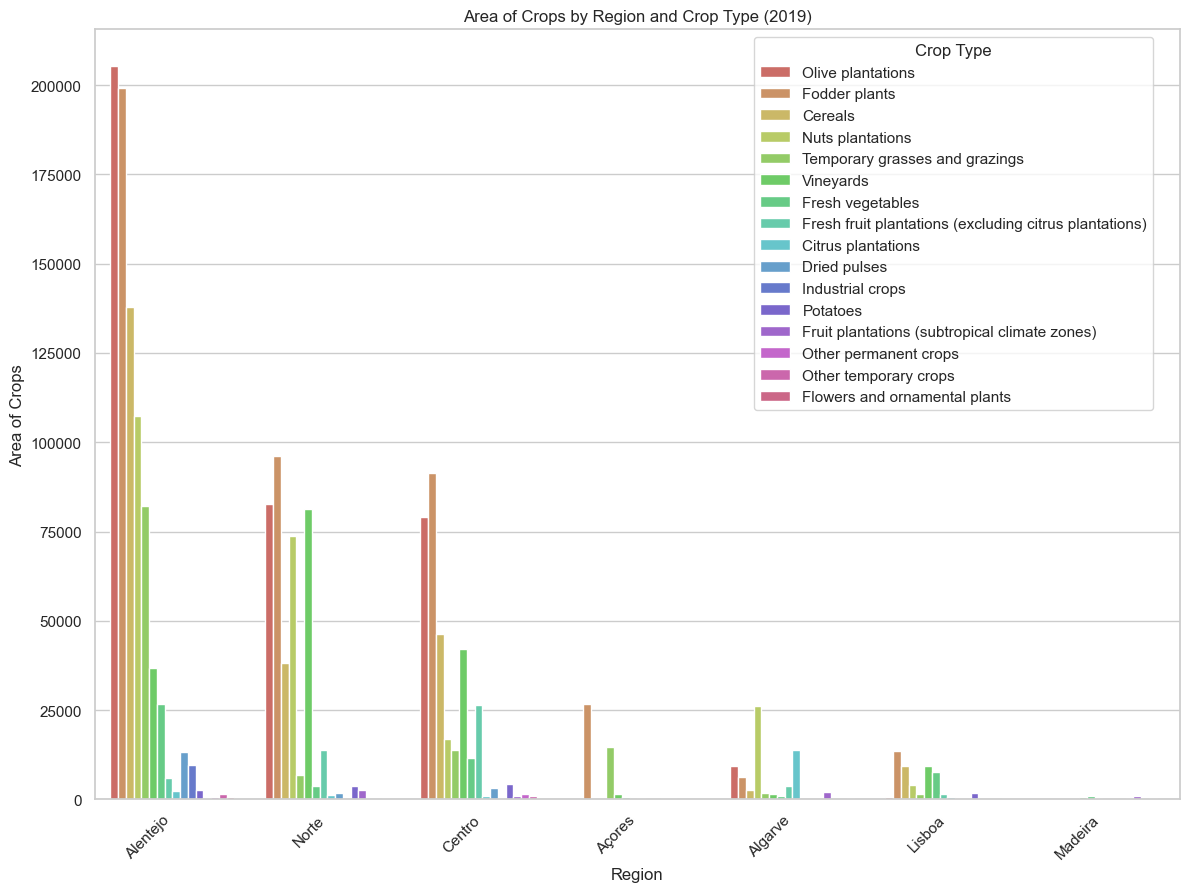

In [39]:
ordered_unpivot = unpivot_only_crops.sort_values(by='area', ascending=False)


# Set style
sns.set(style="whitegrid")

# Create a bar plot for each region
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x='region_name', y='area', hue='crop_name', data=ordered_unpivot, palette="hls")

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel('Region')
plt.ylabel('Area of Crops')
plt.title('Area of Crops by Region and Crop Type (2019)')
plt.legend(title='Crop Type', bbox_to_anchor=(0.6, 1), loc='upper left')

# Show plot
plt.show()

In [51]:
continent_crops = unpivot_only_crops[unpivot_only_crops['region_name'].isin(['Alentejo', 'Algarve', 'Centro', 'Lisboa', 'Norte'])].copy()
island_crops = unpivot_only_crops[unpivot_only_crops['region_name'].isin(['Açores', 'Madeira'])].copy()

In [52]:
continent_crops_area = continent_crops.groupby(['crop_name'])['area'].sum().reset_index()
island_crops_area = island_crops.groupby(['crop_name'])['area'].sum().reset_index()

In [57]:
continent_sum_area = continent_crops_area['area'].sum()
island_sum_area = island_crops_area['area'].sum()

In [61]:
continent_crops_area['area_perc'] = round((continent_crops_area['area'] / continent_sum_area) * 100, 2)
island_crops_area['area_perc'] = round((island_crops_area['area'] / island_sum_area) * 100, 2)

In [65]:
continent_crops_area['region'] = 'Continent'
island_crops_area['region'] = 'Island'

In [66]:
crops_cont_island = pd.concat([continent_crops_area, island_crops_area])
crops_cont_island.head(20)


,crop_name,area,region,area_perc
0,Cereals,234529.0,Continent,13.80
1,Citrus plantations,19146.0,Continent,1.13
2,Dried pulses,18667.0,Continent,1.10
3,Flowers and ornamental plants,1828.0,Continent,0.11
4,Fodder plants,406264.0,Continent,23.91
5,Fresh fruit plantations (excluding citrus plan...,51292.0,Continent,3.02
6,Fresh vegetables,50509.0,Continent,2.97
7,Fruit plantations (subtropical climate zones),6145.0,Continent,0.36
8,Industrial crops,10507.0,Continent,0.62
9,Nuts plantations,228486.0,Continent,13.45


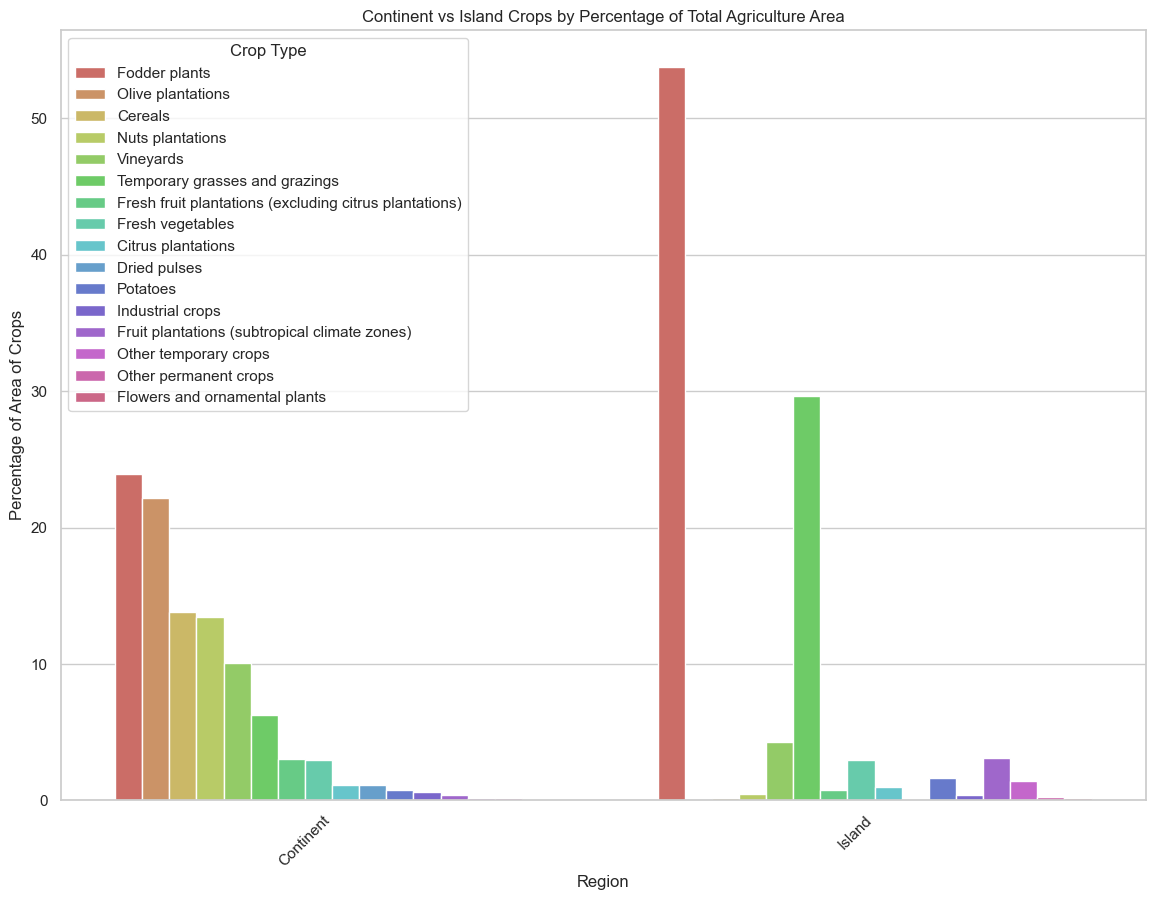

In [86]:
crops_cont_island_sorted = crops_cont_island.sort_values(by='area', ascending=False)


# Set style
sns.set(style="whitegrid")

# Create a bar plot for each region
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x='region', y='area_perc', hue='crop_name', data=crops_cont_island_sorted, palette="hls")

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel('Region')
plt.ylabel('Percentage of Area of Crops')
plt.title('Continent vs Island Crops by Percentage of Total Agriculture Area')
plt.legend(title='Crop Type', bbox_to_anchor=(0, 1), loc='upper left')

# Show plot
plt.show()

In [34]:
unpivot_only_crops.head()

,region_name,crop_name,area
0,Alentejo,Citrus plantations,2260.0
1,Algarve,Citrus plantations,13951.0
2,Açores,Citrus plantations,350.0
3,Centro,Citrus plantations,1039.0
4,Lisboa,Citrus plantations,639.0


In [35]:
crops_total_area = unpivot_only_crops.groupby(['crop_name'])['area'].sum().reset_index()

In [36]:
crops_total_area.head()

,crop_name,area
0,Cereals,234598.0
1,Citrus plantations,19614.0
2,Dried pulses,18697.0
3,Flowers and ornamental plants,1922.0
4,Fodder plants,433044.0


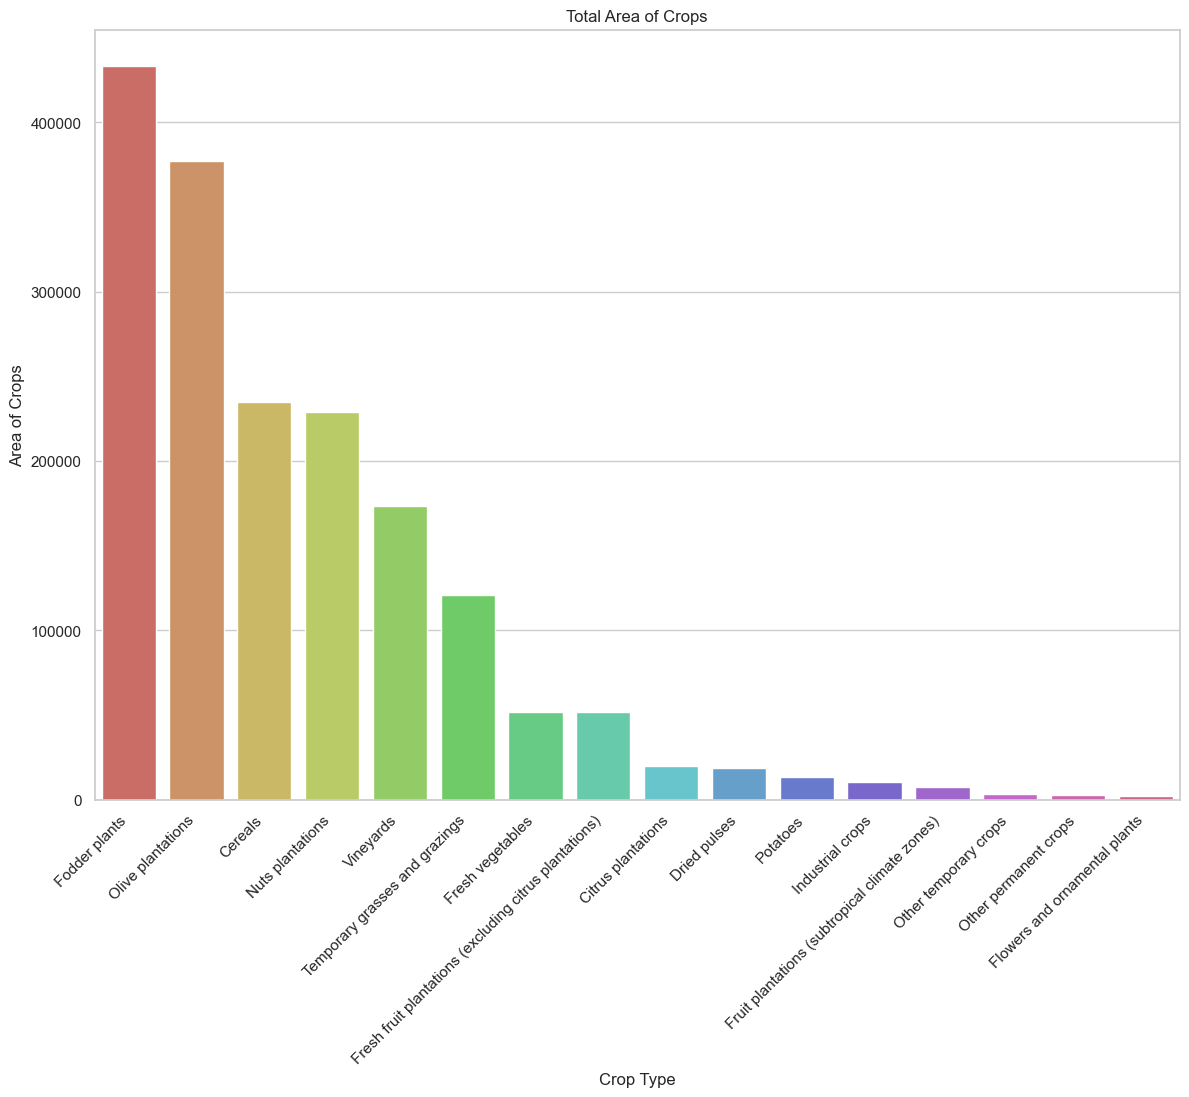

In [38]:
ordered_total_crops = crops_total_area.sort_values(by='area', ascending=False)


# Set style
sns.set(style="whitegrid")

# Create a bar plot for each region
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x='crop_name', y='area', hue='crop_name', data=ordered_total_crops, palette="hls")

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel('Crop Type')
plt.ylabel('Area of Crops')
plt.title('Total Area of Crops')

# Show plot
plt.show()

In [26]:
regions = ['Alentejo', 'Algarve', 'Açores', 'Centro', 'Lisboa', 'Madeira', 'Norte']


In [27]:
prod_df

,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha
0,11,Norte,2,2019,1312536063,1978.7
1,15,Algarve,2,2019,373196278,3709.5
2,16,Centro,2,2019,1786415564,2820.8
3,17,Lisboa,2,2019,313163976,3451.5
4,18,Alentejo,2,2019,2441935279,1038.8
5,20,Açores,2,2019,423978604,3514.6
6,30,Madeira,2,2019,107140853,23269.4


In [48]:
prod_df.drop('p.value_ha', axis=1, inplace=True)

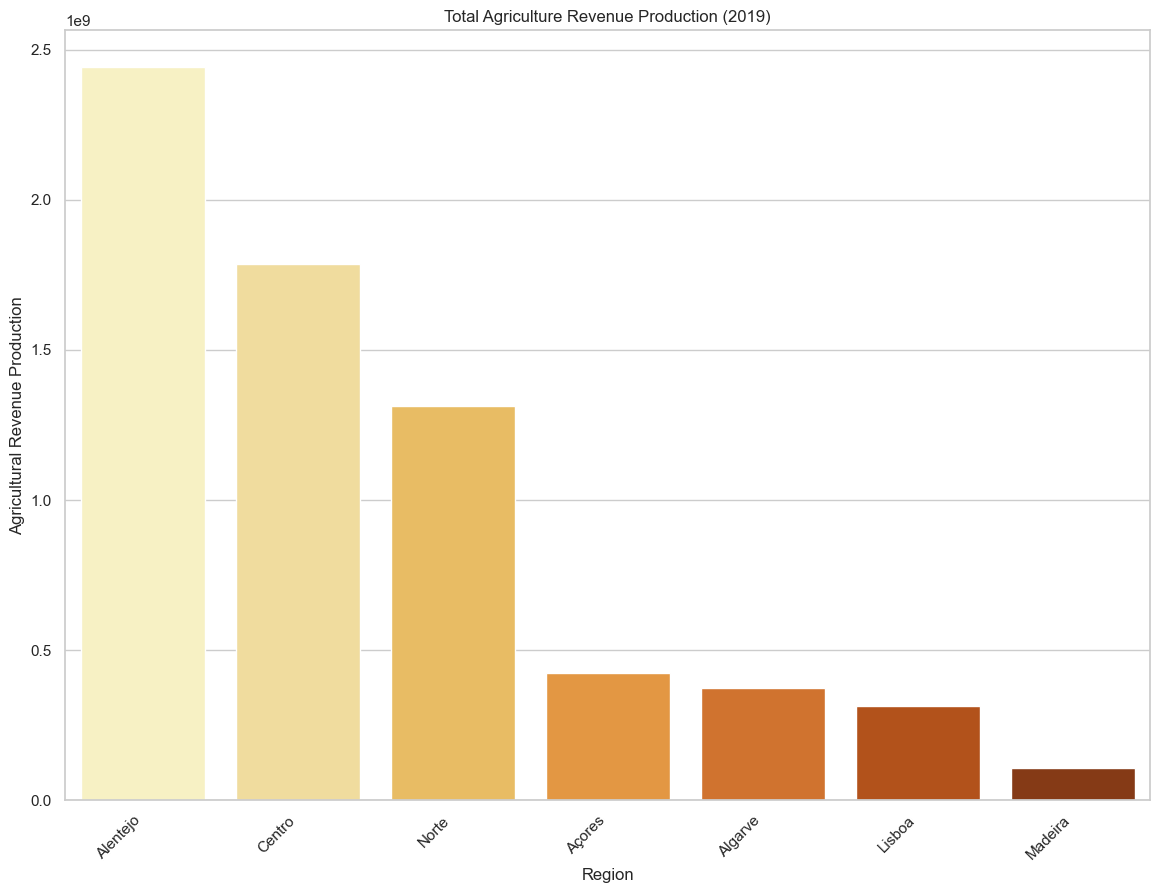

In [28]:
prod_total_ordered = prod_df.sort_values(by='p.value_eur', ascending=False)

# Create a bar plot for each region
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x='region_name', y='p.value_eur', hue='region_name', data=prod_total_ordered, palette="YlOrBr")

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel('Region')
plt.ylabel('Agricultural Revenue Production')
plt.title('Total Agriculture Revenue Production (2019)')

# Show plot
plt.show()

In [49]:
prod_df.head()

,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha
0,11,Norte,2,2019,1312536063,1978.7
1,15,Algarve,2,2019,373196278,3709.5
2,16,Centro,2,2019,1786415564,2820.8
3,17,Lisboa,2,2019,313163976,3451.5
4,18,Alentejo,2,2019,2441935279,1038.8


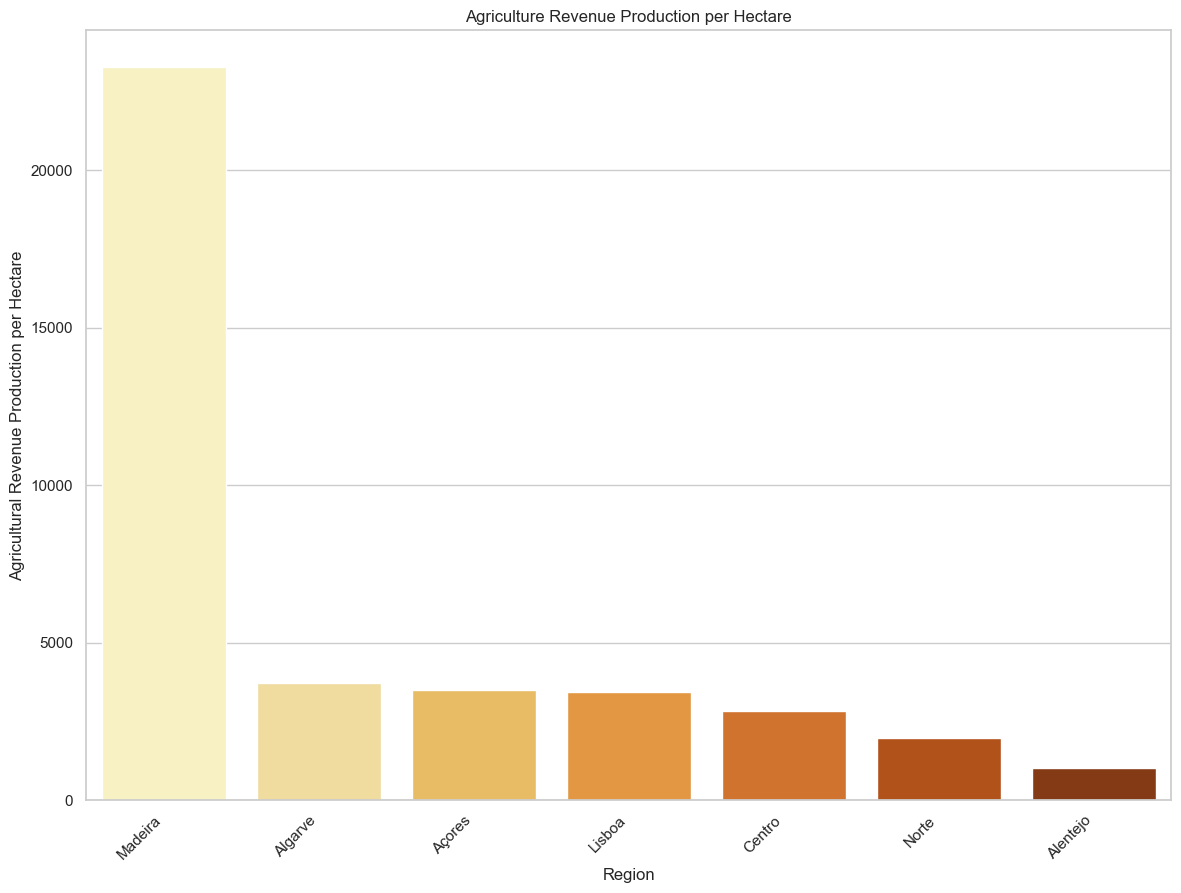

In [50]:
prod_area_value_ordered = prod_df.sort_values(by='p.area_ha', ascending=False)

# Create a bar plot for each region
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x='region_name', y='p.area_ha', hue='region_name', data=prod_area_value_ordered, palette="YlOrBr")

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel('Region')
plt.ylabel('Agricultural Revenue Production per Hectare')
plt.title('Agriculture Revenue Production per Hectare')

# Show plot
plt.show()

## 3. Call the education dataframe

In [29]:
education_df

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level
0,11,Norte,2,2019,257718,Total
1,11,Norte,2,2019,31554,NaN
2,11,Norte,2,2019,161233,Basic
3,11,Norte,2,2019,35410,Secondary / post-secondary
4,11,Norte,2,2019,29521,Superior
5,15,Algarve,2,2019,27522,Total
6,15,Algarve,2,2019,3357,NaN
7,15,Algarve,2,2019,16943,Basic
8,15,Algarve,2,2019,4028,Secondary / post-secondary
9,15,Algarve,2,2019,3194,Superior
